In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import re
import numpy as np


In [2]:
db=pd.read_excel("Comprehensive TAGS v6.1.9, 2016-Feb 2019.xlsx",sheet_name=1)

Create a DataFrame containing each tweet's hashtages

In [87]:
tw_has=db.text.map(lambda x: re.findall(pattern=r"#\w+\w",string=x))

In [88]:
db['tw']=tw_has

In [89]:
db2=db[['tw','from_user']][db.tw.map(lambda x: len(x)>1)]

In [90]:
newls=[]
for i in db2.itertuples():
    i.tw.append(i.Index)
    newls.append(i.tw)

Convert it to a list

In [5]:
tw_has.tolist()

[['#SilentSam'],
 ['#silentsam'],
 ['#SilentSam'],
 ['#racists',
  '#confederacy',
  '#HeirsOfTheConfederacy',
  '#ConfederateFlag',
  '#SilentSam',
  '#anti'],
 ['#SilentSam'],
 ['#silentsam', '#philosophy'],
 ['#SilentSam', '#NeoConfederacy'],
 ['#SilentSam', '#NeoConfederacy'],
 ['#DTH126', '#SilentSam'],
 ['#racists',
  '#confederacy',
  '#HeirsOfTheConfederacy',
  '#ConfederateFlag',
  '#SilentSam',
  '#anti'],
 ['#silentsam'],
 ['#SilentSam', '#NeoConfederacy'],
 ['#SilentSam'],
 ['#SilentSam'],
 ['#SilentSam', '#NeoConfederacy'],
 ['#SilentSam', '#NeoConfederacy'],
 ['#SilentSam'],
 ['#SilentSam', '#NeoConfederacy'],
 ['#SilentSam'],
 ['#SilentSam'],
 ['#Silentsam'],
 ['#SilentSam'],
 ['#SilentSam', '#NeoConfederacy'],
 ['#SilentSam'],
 ['#SilentSam'],
 ['#SilentSam', '#NeoConfederacy'],
 ['#racists',
  '#confederacy',
  '#HeirsOfTheConfederacy',
  '#ConfederateFlag',
  '#SilentSam',
  '#anti'],
 ['#silentsam'],
 ['#SilentSam'],
 ['#SilentSam', '#NeoConfederacy'],
 ['#SilentSam'

Flatten the lists of list

In [6]:
has_ls=[item.lower() for ls in tw_has.tolist() for item in ls ]

102153 hashtags have been mentioned in the corpus

In [7]:
len(has_ls)

102153

Create a Counter to count the occurance of each hashtages

In [8]:
from collections import Counter
Counter(has_ls).most_common(10)

[('#silentsam', 59709),
 ('#unc', 10211),
 ('#ncpol', 2947),
 ('#silencesam', 2867),
 ('#ncga', 1162),
 ('#chapelhill', 1009),
 ('#confederate', 870),
 ('#wral', 689),
 ('#strikedownsam', 658),
 ('#abc11', 477)]

In [92]:
newls

[['#racists',
  '#confederacy',
  '#HeirsOfTheConfederacy',
  '#ConfederateFlag',
  '#SilentSam',
  '#anti',
  3],
 ['#silentsam', '#philosophy', 5],
 ['#SilentSam', '#NeoConfederacy', 6],
 ['#SilentSam', '#NeoConfederacy', 7],
 ['#DTH126', '#SilentSam', 8],
 ['#racists',
  '#confederacy',
  '#HeirsOfTheConfederacy',
  '#ConfederateFlag',
  '#SilentSam',
  '#anti',
  9],
 ['#SilentSam', '#NeoConfederacy', 11],
 ['#SilentSam', '#NeoConfederacy', 14],
 ['#SilentSam', '#NeoConfederacy', 15],
 ['#SilentSam', '#NeoConfederacy', 17],
 ['#SilentSam', '#NeoConfederacy', 22],
 ['#SilentSam', '#NeoConfederacy', 25],
 ['#racists',
  '#confederacy',
  '#HeirsOfTheConfederacy',
  '#ConfederateFlag',
  '#SilentSam',
  '#anti',
  26],
 ['#SilentSam', '#NeoConfederacy', 29],
 ['#SilentSam', '#NeoConfederacy', 30],
 ['#SilentSam', '#NeoConfederacy', 42],
 ['#silencesam',
  '#rustinpiecessilentsam',
  '#tarheelantifascism',
  '#gdtbath',
  '#silentsam',
  '#antiracism',
  '#fucktheconfederacy',
  '#take

In [23]:
t=["a","b","c","d"]

In [97]:
l=[]

In [99]:
for ls in tw_has[tw_has.map(lambda x: len(x)>1)]:
    for i in range(len(ls)-1):
        for j in range(i+1,len(ls)-1):
            a = ls[i].lower()
            b = ls[j].lower()
            l.append([a,b,ls[-1]])

In [102]:
newdb2=pd.DataFrame(l)

In [104]:
newdb2.columns=["from","to","index"]

In [107]:
static=pd.read_csv("Static Tweets with Norm Loc.csv")

c:\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,22,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [110]:
compredb=pd.merge(newdb2, static, left_on="index", right_index=True)

In [125]:
compredb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95323 entries, 0 to 95322
Data columns (total 45 columns):
from                         95323 non-null object
to                           95323 non-null object
index                        95323 non-null int64
Unnamed: 0                   95323 non-null object
id_str                       95323 non-null float64
from_user                    95323 non-null object
text                         95323 non-null object
time                         95323 non-null object
geo_coordinates              31 non-null object
user_lang                    95323 non-null object
in_reply_to_screen_name      5110 non-null object
from_user_id_str             95323 non-null float64
in_reply_to_status_id_str    4316 non-null float64
source                       95323 non-null object
user_followers_count         95260 non-null float64
user_friends_count           95175 non-null float64
user_location                73699 non-null object
entities_str             

In [132]:
final_ds=compredb.iloc[:,[0,1,2,5,14,15,19,20,23,24,25,26,27,28,30,31,34,35,36,37,-4,-3]]

In [133]:
final_ds.to_csv("hastages with info.csv")

## Dont need the things below

In [47]:
tw_has[tw_has.map(lambda x: len(x)>1)]

3        [#racists, #confederacy, #HeirsOfTheConfederac...
5                                [#silentsam, #philosophy]
6                            [#SilentSam, #NeoConfederacy]
7                            [#SilentSam, #NeoConfederacy]
8                                    [#DTH126, #SilentSam]
9        [#racists, #confederacy, #HeirsOfTheConfederac...
11                           [#SilentSam, #NeoConfederacy]
14                           [#SilentSam, #NeoConfederacy]
15                           [#SilentSam, #NeoConfederacy]
17                           [#SilentSam, #NeoConfederacy]
22                           [#SilentSam, #NeoConfederacy]
25                           [#SilentSam, #NeoConfederacy]
26       [#racists, #confederacy, #HeirsOfTheConfederac...
29                           [#SilentSam, #NeoConfederacy]
30                           [#SilentSam, #NeoConfederacy]
42                           [#SilentSam, #NeoConfederacy]
43       [#silencesam, #rustinpiecessilentsam, #tarheel.

In [9]:
tw_has.reset_index()

,index,text
0,0,[#SilentSam]
1,1,[#silentsam]
2,2,[#SilentSam]
3,3,"[#racists, #confederacy, #HeirsOfTheConfederac..."
4,4,[#SilentSam]
5,5,"[#silentsam, #philosophy]"
6,6,"[#SilentSam, #NeoConfederacy]"
7,7,"[#SilentSam, #NeoConfederacy]"
8,8,"[#DTH126, #SilentSam]"
9,9,"[#racists, #confederacy, #HeirsOfTheConfederac..."


In [20]:
has_co

3        [#racists, #confederacy, #HeirsOfTheConfederac...
5                                [#silentsam, #philosophy]
6                            [#SilentSam, #NeoConfederacy]
7                            [#SilentSam, #NeoConfederacy]
8                                    [#DTH126, #SilentSam]
9        [#racists, #confederacy, #HeirsOfTheConfederac...
11                           [#SilentSam, #NeoConfederacy]
14                           [#SilentSam, #NeoConfederacy]
15                           [#SilentSam, #NeoConfederacy]
17                           [#SilentSam, #NeoConfederacy]
22                           [#SilentSam, #NeoConfederacy]
25                           [#SilentSam, #NeoConfederacy]
26       [#racists, #confederacy, #HeirsOfTheConfederac...
29                           [#SilentSam, #NeoConfederacy]
30                           [#SilentSam, #NeoConfederacy]
42                           [#SilentSam, #NeoConfederacy]
43       [#silencesam, #rustinpiecessilentsam, #tarheel.

Find all co-occurance

In [10]:
has_co=tw_has[tw_has.apply(lambda x: len(x)>1)]

In [11]:
d={}

In [12]:
def buildKeys(ls):
    for i in range(len(ls)):
        for j in range(i+1,len(ls)):
            a = ls[i].lower()
            b = ls[j].lower()
            d.setdefault(a,{}).setdefault(b,{}).setdefault("weight",0)
            d[a][b]['weight'] += 1
    for i in range(len(ls)-1,-1,-1):
        for j in range(i-1,-1,-1):
            a = ls[i].lower()
            b = ls[j].lower()
            d.setdefault(a,{}).setdefault(b,{}).setdefault("weight",0)
            d[a][b]['weight'] += 1
          
           

In [13]:
has_co.apply(buildKeys)

3        None
5        None
6        None
7        None
8        None
9        None
11       None
14       None
15       None
17       None
22       None
25       None
26       None
29       None
30       None
42       None
43       None
44       None
51       None
52       None
55       None
57       None
59       None
60       None
62       None
64       None
65       None
69       None
70       None
72       None
         ... 
59204    None
59205    None
59206    None
59207    None
59208    None
59209    None
59211    None
59212    None
59215    None
59216    None
59218    None
59219    None
59221    None
59223    None
59224    None
59226    None
59229    None
59230    None
59232    None
59233    None
59234    None
59235    None
59237    None
59238    None
59240    None
59241    None
59246    None
59248    None
59249    None
59251    None
Name: text, Length: 23884, dtype: object

In [14]:
len(d)

2871

AttributeError: module 'pandas' has no attribute 'from_dict'

In [16]:
G=nx.Graph()

In [17]:
G=nx.from_dict_of_dicts(d)

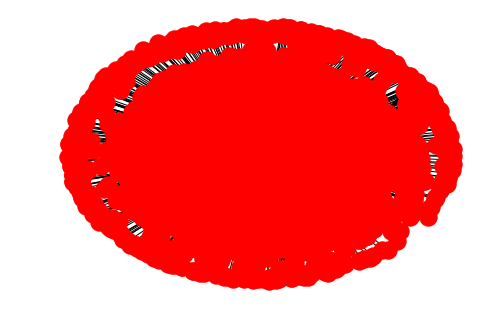

In [18]:
nx.draw(G)

In [19]:
d1

NameError: name 'd1' is not defined

In [ ]:

def buildKeys2(ls):
    for i in range(len(ls)):
        for j in range(i+1,len(ls)):
            a = ls[i].lower()
            b = ls[j].lower()
            d1.setdefault(a,{}).setdefault(b,{}).setdefault("weight",0)
            d1[a][b]['weight'] += 1

In [ ]:
has_co.apply(buildKeys2)

In [ ]:
d1

In [ ]:
count=0
sum=0
for i in tuple(G1.edges(data=True)):
    count+=1
    sum+=i[2]['weight']

In [ ]:
mean=sum/count
mean

In [ ]:
import numpy as np


In [ ]:
#pos=nx.graphviz_layout(G)

plt.figure(figsize=(15, 15))
#nx.draw_random(G1,node_size=20,node_color='r',alpha=0.1, with_labels=True)
SG=nx.Graph( [ (u,v,d) for u,v,d in G1.edges(data=True) if d 
['weight']>40] )

node_size = list(nx.get_node_attributes(SG, 'weight').values())
pos=nx.spring_layout(SG,scale=5)
img= nx.draw_networkx_nodes(SG, pos=pos,node_size=list(dict(SG.degree).values()),cmp=plt.cm.Reds,node_color=range(len(SG)))
img= nx.draw_networkx_edges(SG, pos=pos,node_size=list(dict(SG.degree).values()),alpha=0.3)
pos2=pos
for i in pos2.values():
    i[1]+=0.16
img= nx.draw_networkx_labels(SG, pos=pos2,font_size=12)
plt.title("Co-occurrence Network of the Hashtages with 40 or Higher Edge Weights")

#get

In [ ]:
pos2=pos
for i in pos2.values():
    i[1]+=0.01

In [ ]:
[i for i in tw_has if len(i)>2]

In [ ]:
db.text[3]

In [ ]:
def gen_dic(ls):
    size=len(ls)
    for i in ls:
        temp=ls.remove